In [1]:
%load_ext autoreload
%autoreload 2

from cdk.analysis.cytosol import platereader as pr
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

# Initialize plotting
pr.plot_setup()

# Analysis: 20250811

All the data is in the same file, so I just updated the platemap to include everything and to add some extra labels we can slice the data by and to make the names simpler so that the legends are easier to interpret. The original spreadsheet is [here on google drive](https://docs.google.com/spreadsheets/d/1UHafCZ0OuN6uwy3IjGm4Jo9WtTPgtQsRLf3Ll2aYKBg/edit?usp=sharing).

In [2]:
platemap_path = "../Platemap (acjs)/20250811-acjs-PPK-platemap.tsv"
data_path = "../data/20250729-104410-cytation5-pure-timecourse-gfp--biotek-cdk.txt"

data, platemap = pr.load_platereader_data(data_path, platemap_path)

# Plots

Make some timeseries plots. We can add extra parameters to slice the data different ways (like `hue` and `col` below). The `plot_curves` function takes the same parameters as [relplot in Seaborn](https://seaborn.pydata.org/generated/seaborn.relplot.html).

Make a plot per crowding molecule (`col="Crowder"`), coloring each line by the kind of metabolism (`hue="Metabolism"`).

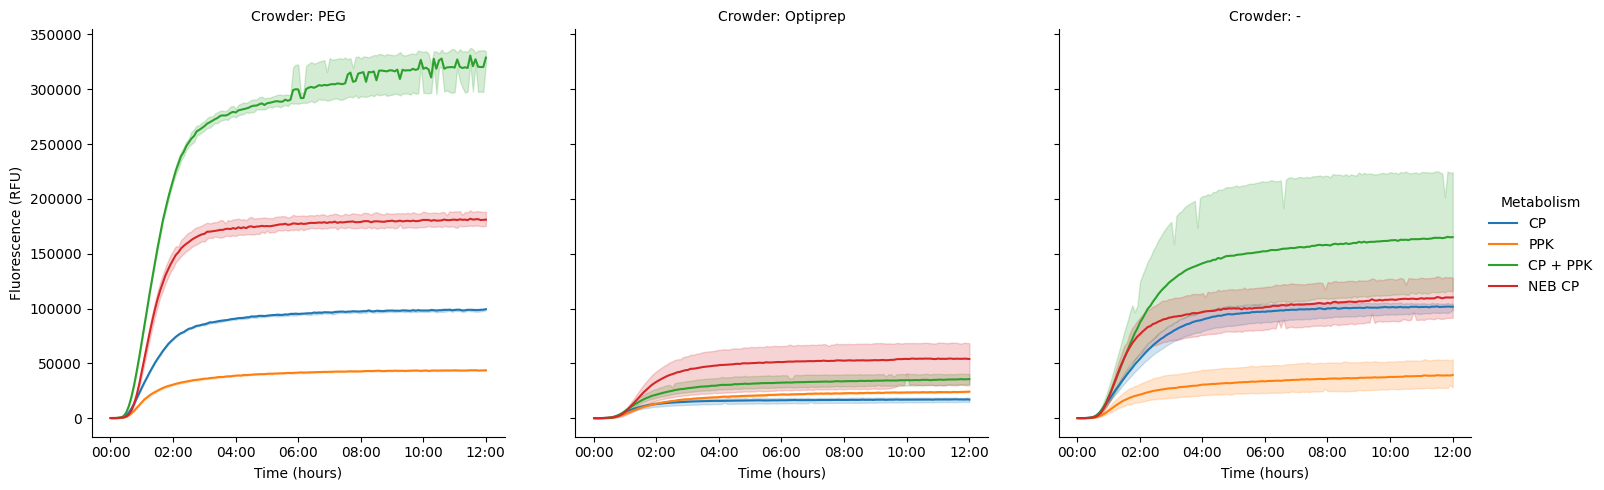

In [3]:
pr.plot_curves(data, hue="Metabolism", col="Crowder");

Swap them around, so we're looking at the difference between crowders, split out by the kind of metabolism. It's interesting that CP is really similar for both PEG and no crowder, while PEG solidly beats no crowder in the NEB positive.

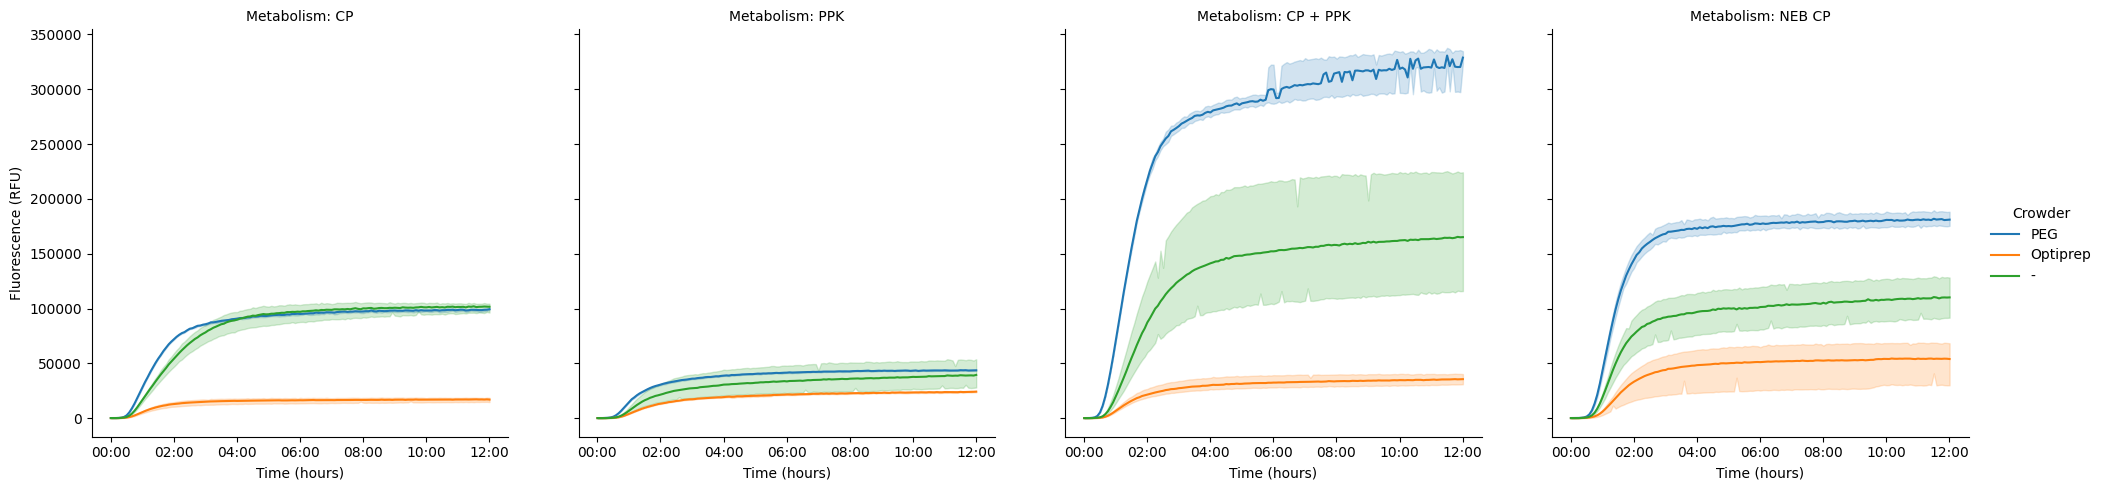

In [4]:
pr.plot_curves(data, hue="Crowder", col="Metabolism");

## Replicates

Let's take a look at the individual traces, to see where the wide errors on the traces are coming from.

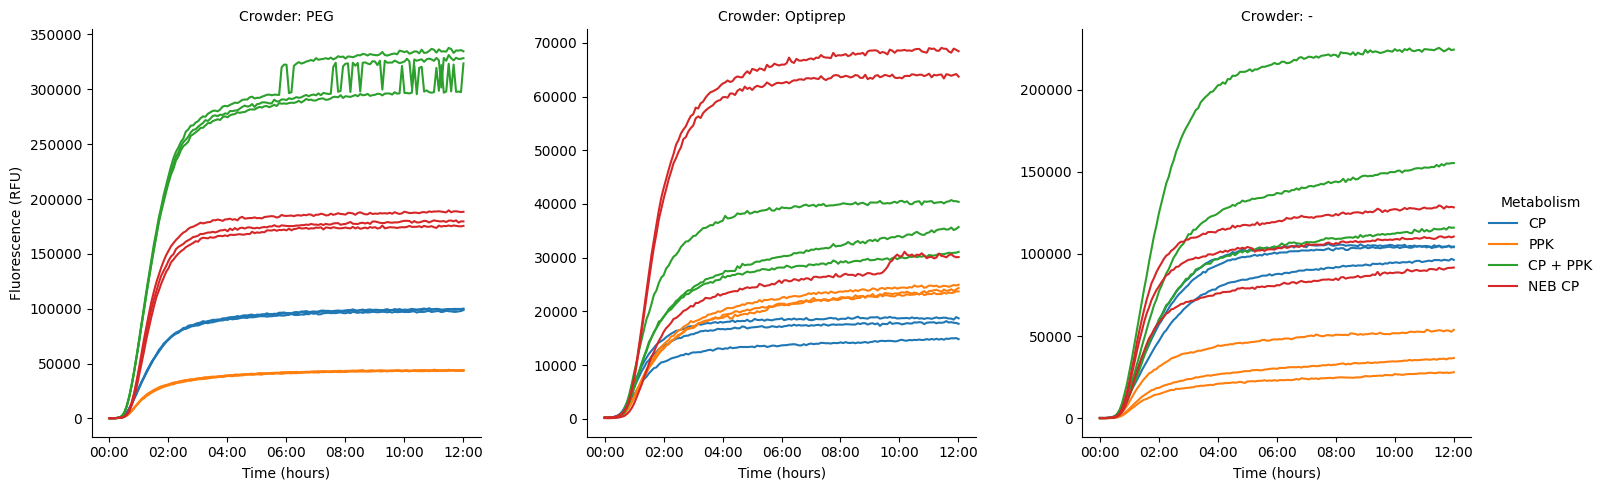

In [5]:
pr.plot_curves(data, hue="Metabolism", col="Crowder", units="Well", estimator=None, facet_kws={"sharey":False});

Looks like the variance is, in general, coming from either a very high or very low replicate within a set. In the Optiprep set, we see two nice high lines for the NEB positive, plus one weirdly low one. In the no-crowder set, we see a nice high curve for CP+PPK, and two lower curves, though they're all kind of spread out. The three NEB positive lines are also spread out, though not so much. 

The PEG lines are all nicely clustered, and we see the weird step change happen to all of them (at different times). Unclear what this is--worth digging into. Given the wells were in different parts of the plate, it's also interesting to consider whether the higher variance is somehow coming from their location on plate.

Let's plot them with a shared Y axis, just to see the variance, etc, in relation to the overall scale of the experiment as a whole.

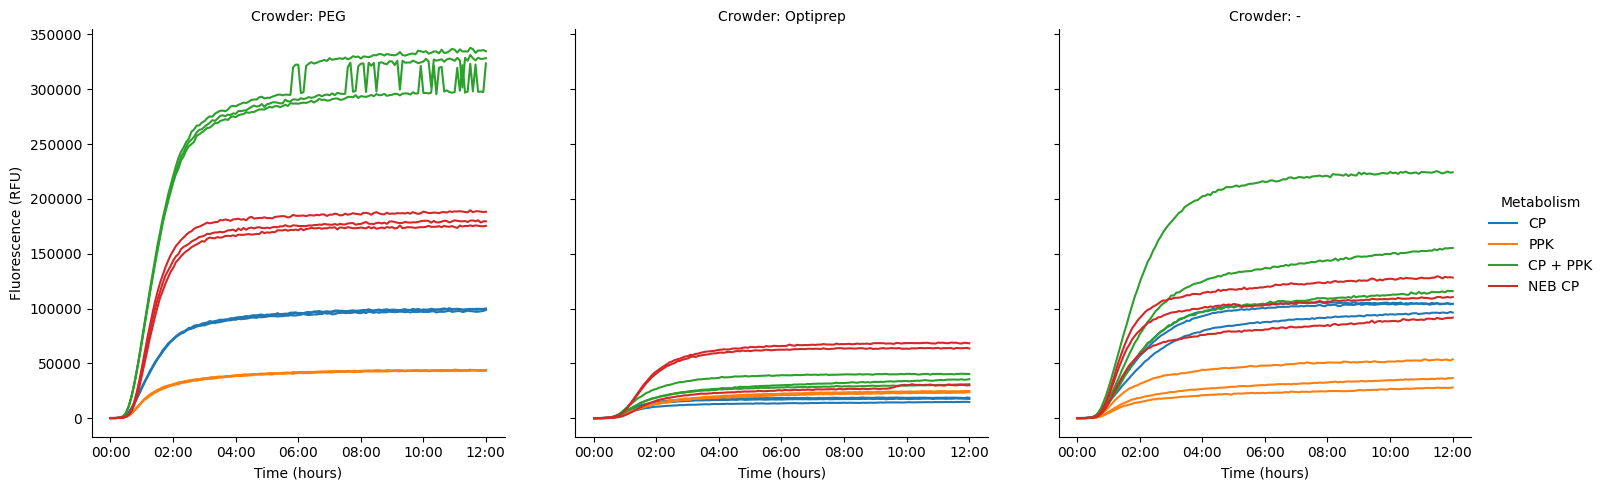

In [6]:
pr.plot_curves(data, hue="Metabolism", col="Crowder", units="Well", estimator=None);

We can also crop back the time to ~steady state, so that we can better see differences in the early kinetic curve.

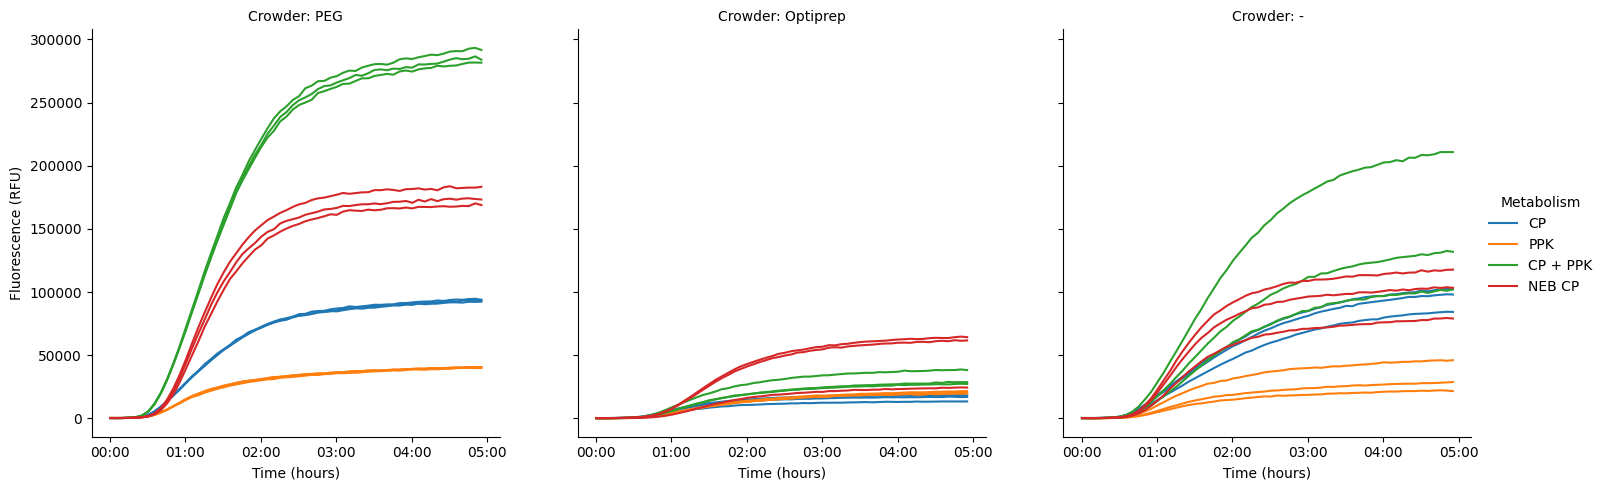

In [7]:
pr.plot_curves(data[data["Time"] < "5:00:00"], hue="Metabolism", col="Crowder", units="Well", estimator=None);

To really split it out, we could look at only the replicates for each Crowder-Metabolism pair, so we're just looking at three lines per plot.

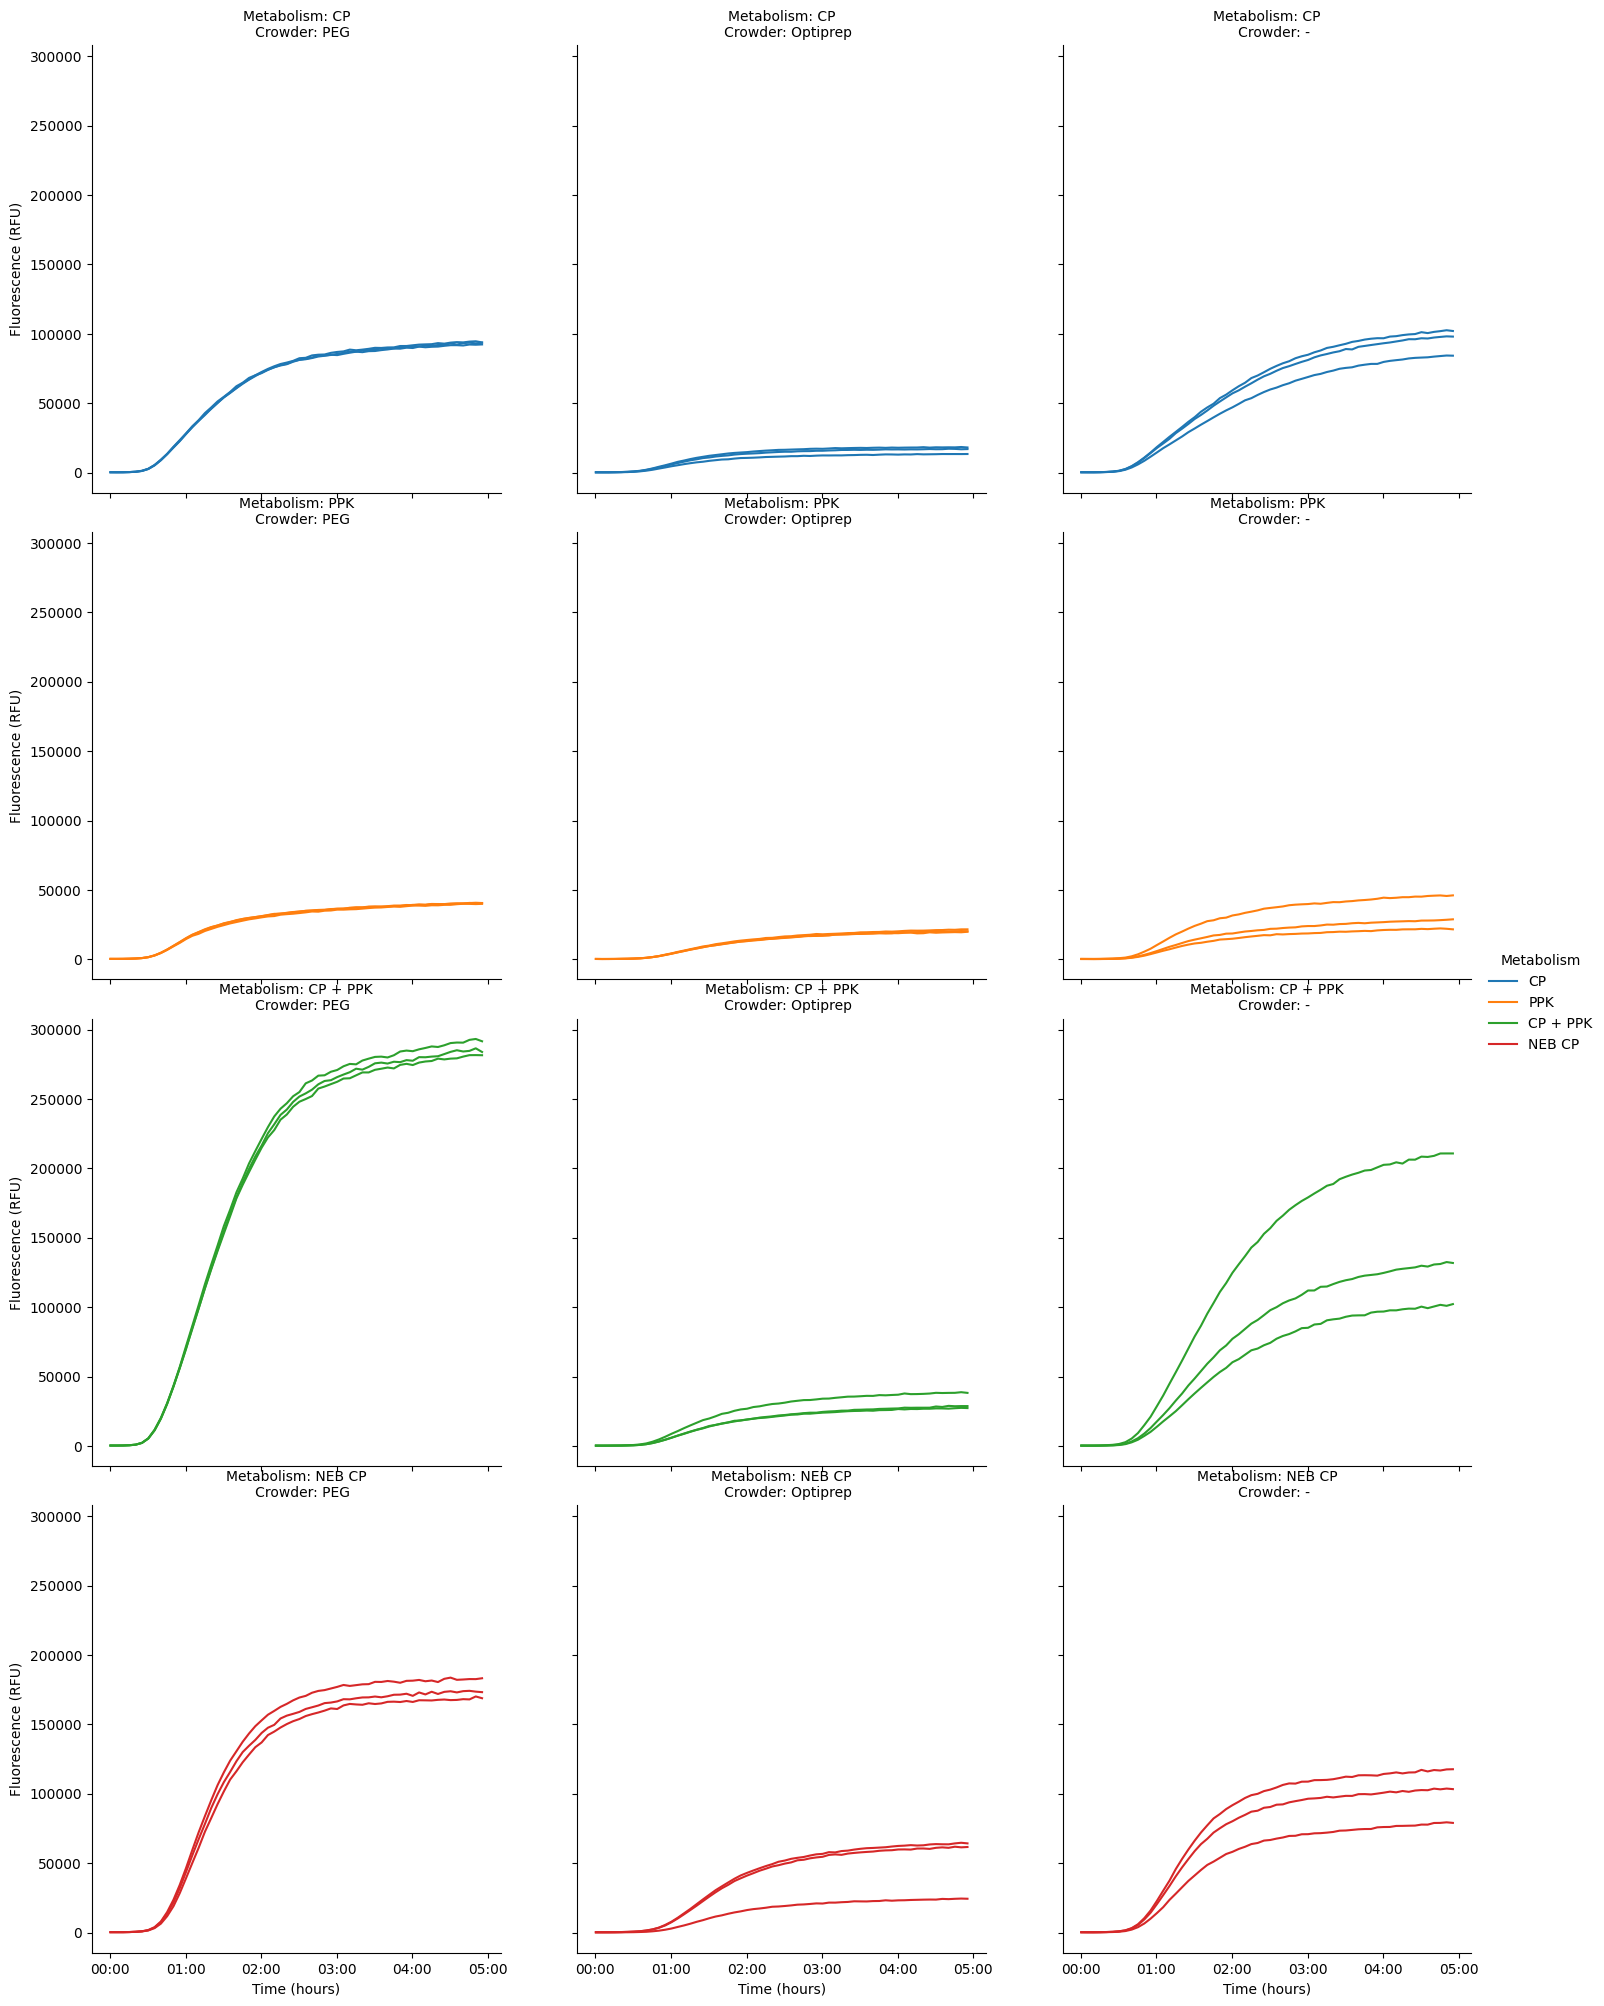

In [9]:
pr.plot_curves(data[data["Time"] < "5:00:00"], hue="Metabolism", row="Metabolism", col="Crowder", units="Well", estimator=None);

## Steady state

Same as we did for the timeseries, this time doing the kind of metabolism on the x axis (`x="Metabolism"`) and crowder as color (`hue="Crowder"`).

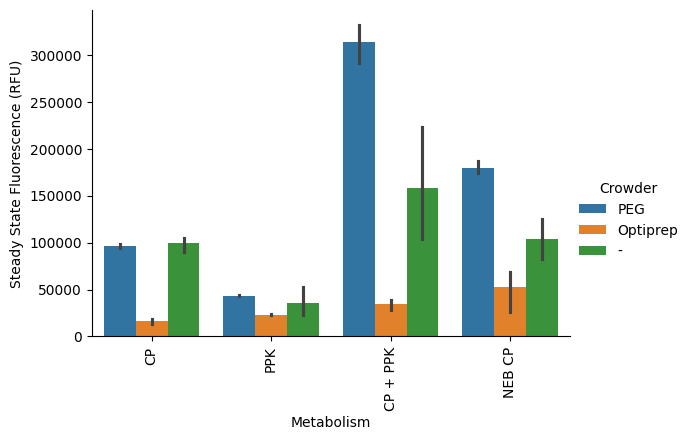

In [10]:
p = pr.plot_steadystate(data, x="Metabolism", hue="Crowder");

Swap them around like we did before, in case this is easier to read.

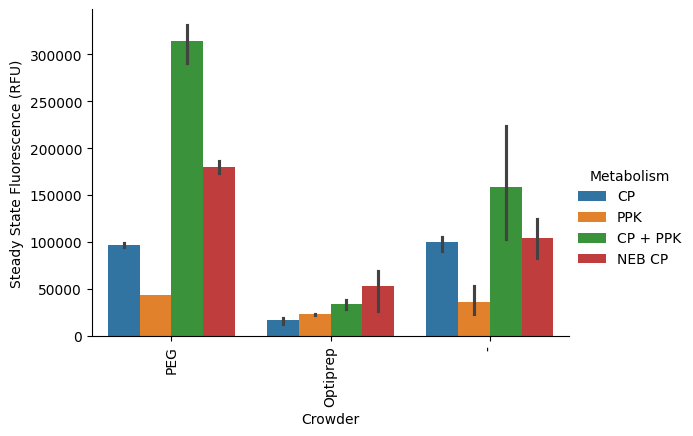

In [11]:
p = pr.plot_steadystate(data, x="Crowder", hue="Metabolism");

Make a plot like we had above, with one panel per crowder.

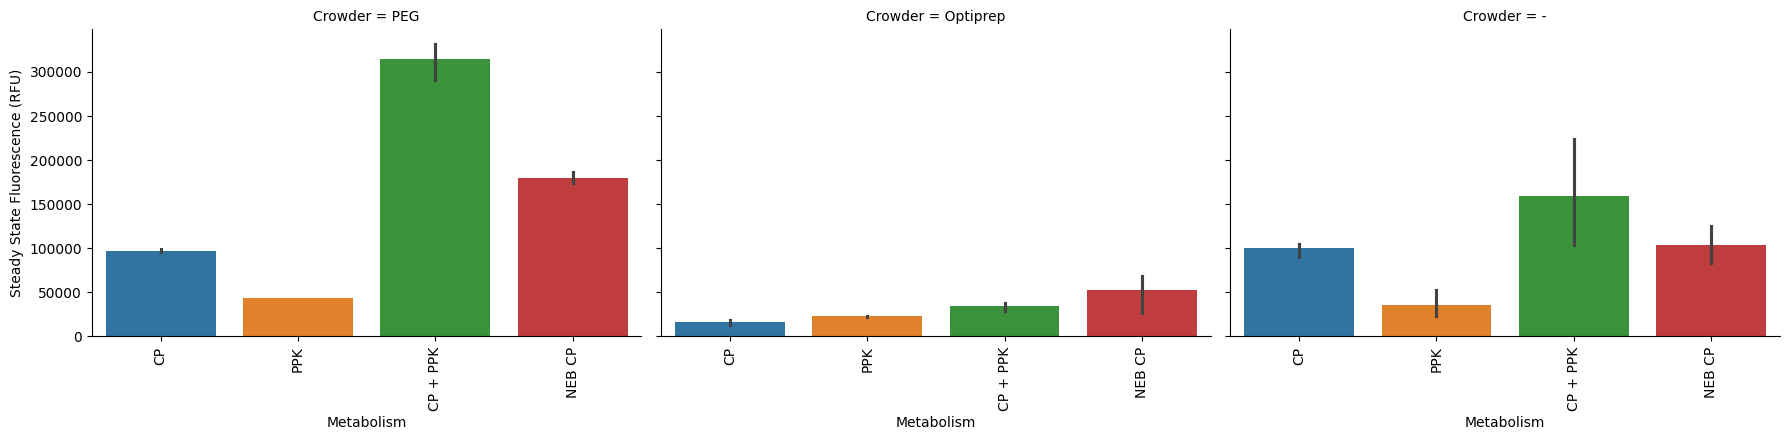

In [12]:
p = pr.plot_steadystate(data, x="Metabolism", hue="Metabolism", col="Crowder", col_wrap=3);

## Error Bars

The error bars are noticeably smaller than what we'd guess by eye from the curves--why is this? By default, the error bars are plotting the 95% confidence interval--the range within which we expect the true mean falls. There are other ways to visualize the error. First, let's look at what all the steady states look like (per well):

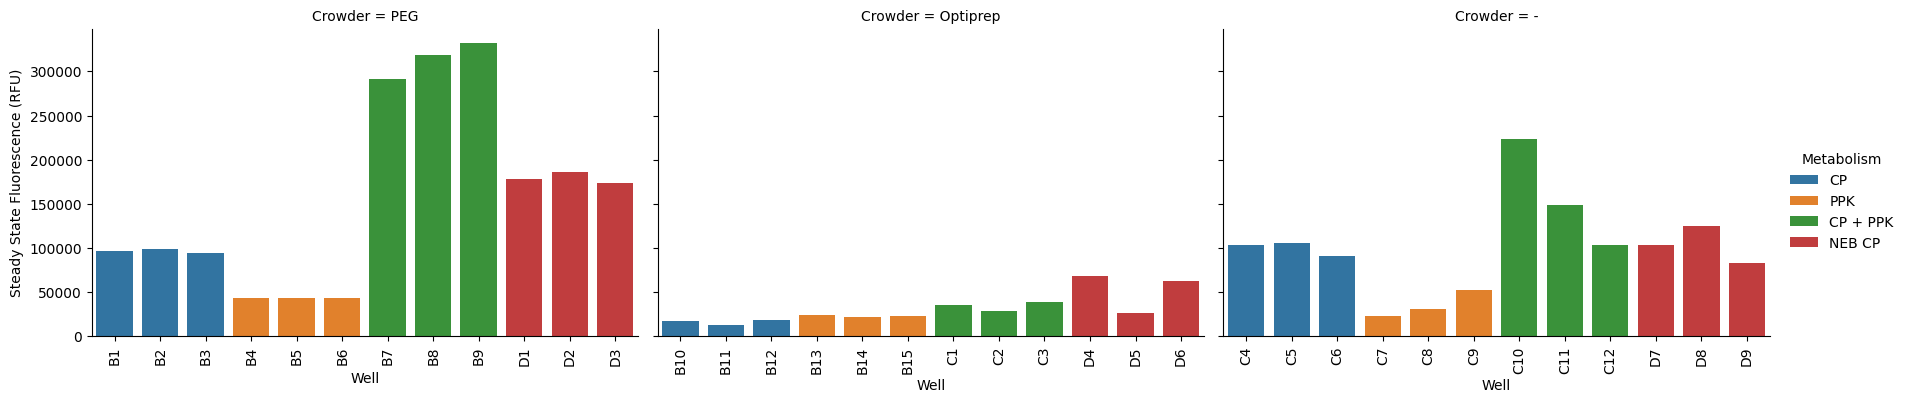

In [13]:
p = pr.plot_steadystate(data, x="Well", hue="Metabolism", col="Crowder", col_wrap=3);

This matches what we see in the curves more closely. The variance in some of the experiments looks a lot less bad, when scaled to the max of the best experiment (this might actually be kind of misleading though).

Let's plot one of the earlier graphs, but with some different estimates of error/variance. Check out [the seaborn documentation on uncertainty](https://seaborn.pydata.org/tutorial/error_bars.html) for an explanation of what these all are.

First, standard deviation:

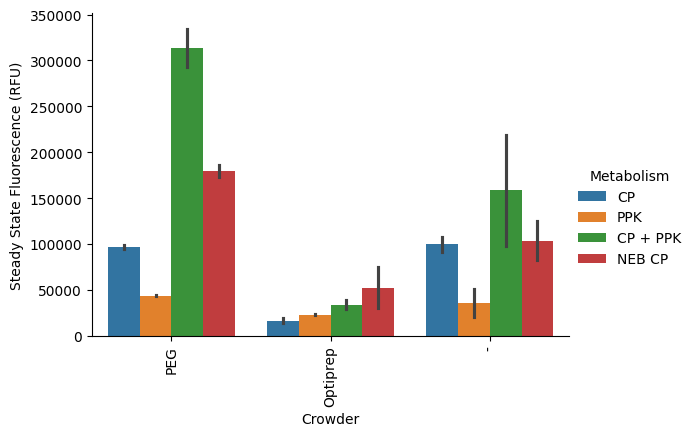

In [14]:
p = pr.plot_steadystate(data, x="Crowder", hue="Metabolism", errorbar="sd");

This looks a lot more like we're expecting. What about percent interval?

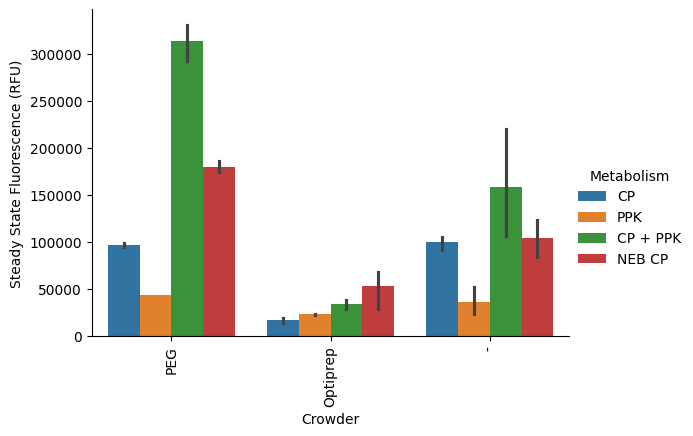

In [15]:
p = pr.plot_steadystate(data, x="Crowder", hue="Metabolism", errorbar="pi");

Also pretty solid. We can try the standard error:

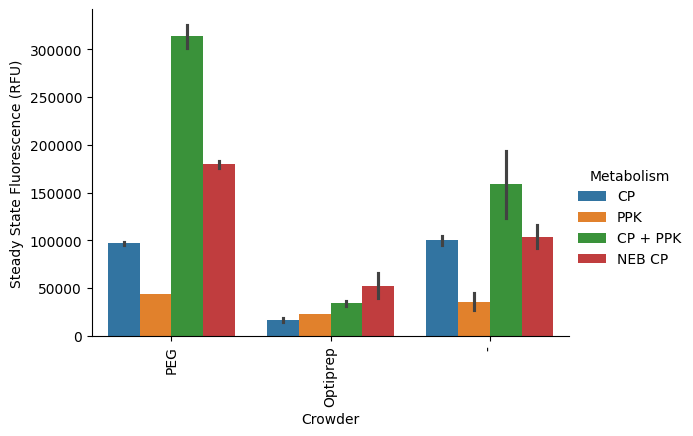

In [16]:
p = pr.plot_steadystate(data, x="Crowder", hue="Metabolism", errorbar="se");

This is unsurprisingly similar to the 95% confidence interval, given our low number of samples. Overall, we should probably change the default errorbar estimator to the standard deviation, since it's less surprising and we're unlikely to have a large population in any sample (large number of replicates).

We can also provide a custom estimator--let's use one that plots the range:

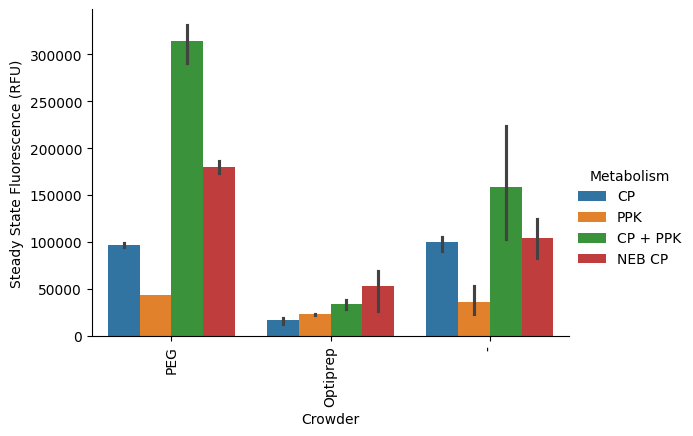

In [17]:
p = pr.plot_steadystate(data, x="Crowder", hue="Metabolism", errorbar=lambda x: (x.min(), x.max()));

Perhaps this is even better than the SD, since we know we're likely to have 2-3, and probably at most 5, replicates of a given sample. 

New feature inspired--let's plot the raw data points (per well) on top of the bars:

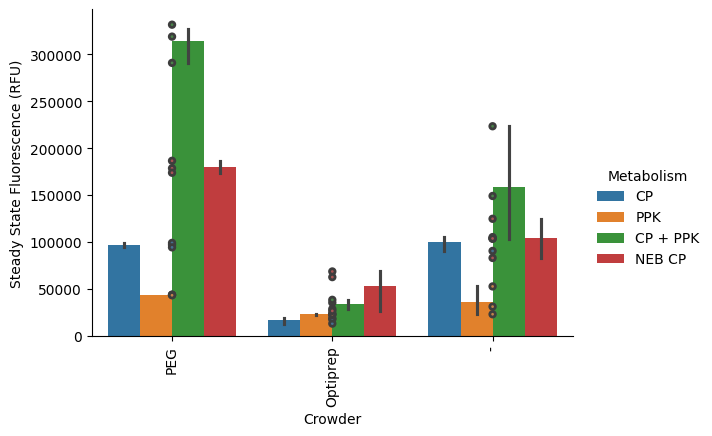

In [18]:
p = pr.plot_steadystate(data, x="Crowder", hue="Metabolism", show_points=True);

# Mg Concentration vs Optiprep

/opt/anaconda3/envs/bnext-cdk/lib/python3.12/site-packages/seaborn/axisgrid.py:854: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  func(*plot_args, **plot_kwargs)


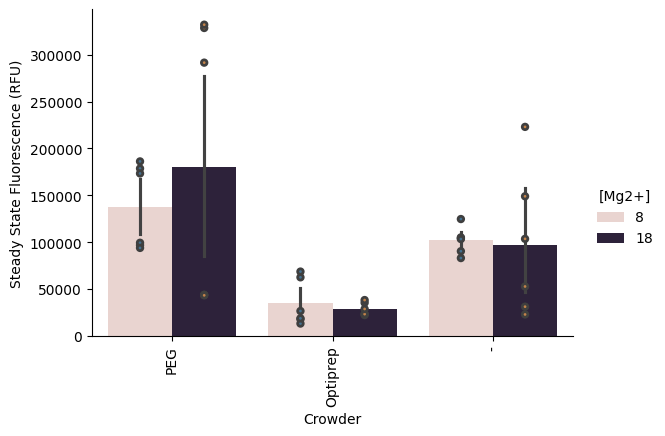

In [4]:
p = pr.plot_steadystate(data, x="Crowder", hue="[Mg2+]", show_points=True)

/opt/anaconda3/envs/bnext-cdk/lib/python3.12/site-packages/seaborn/axisgrid.py:854: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  func(*plot_args, **plot_kwargs)
/opt/anaconda3/envs/bnext-cdk/lib/python3.12/site-packages/seaborn/axisgrid.py:854: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  func(*plot_args, **plot_kwargs)
/opt/anaconda3/envs/bnext-cdk/lib/python3.12/site-packages/seaborn/axisgrid.py:854: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  func(*plot_args, **plot_kwargs)


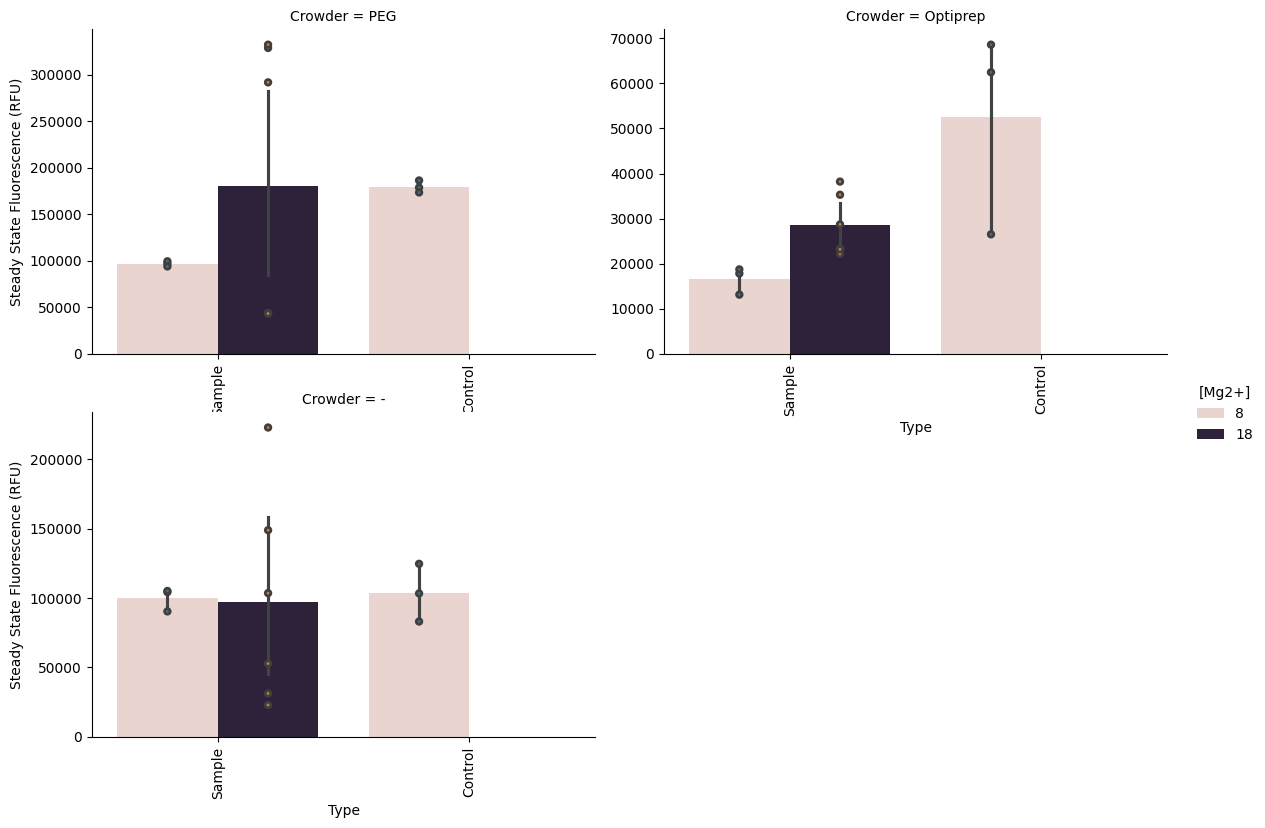

In [18]:
p = pr.plot_steadystate(data, hue="[Mg2+]", col="Crowder", x="Type", sharey=False, show_points=True)

# Kinetics Analysis

Plot the overall kinetics. This plot is going to be huge, so we increase the number of columns we're willing to make (`col_wrap=4`).

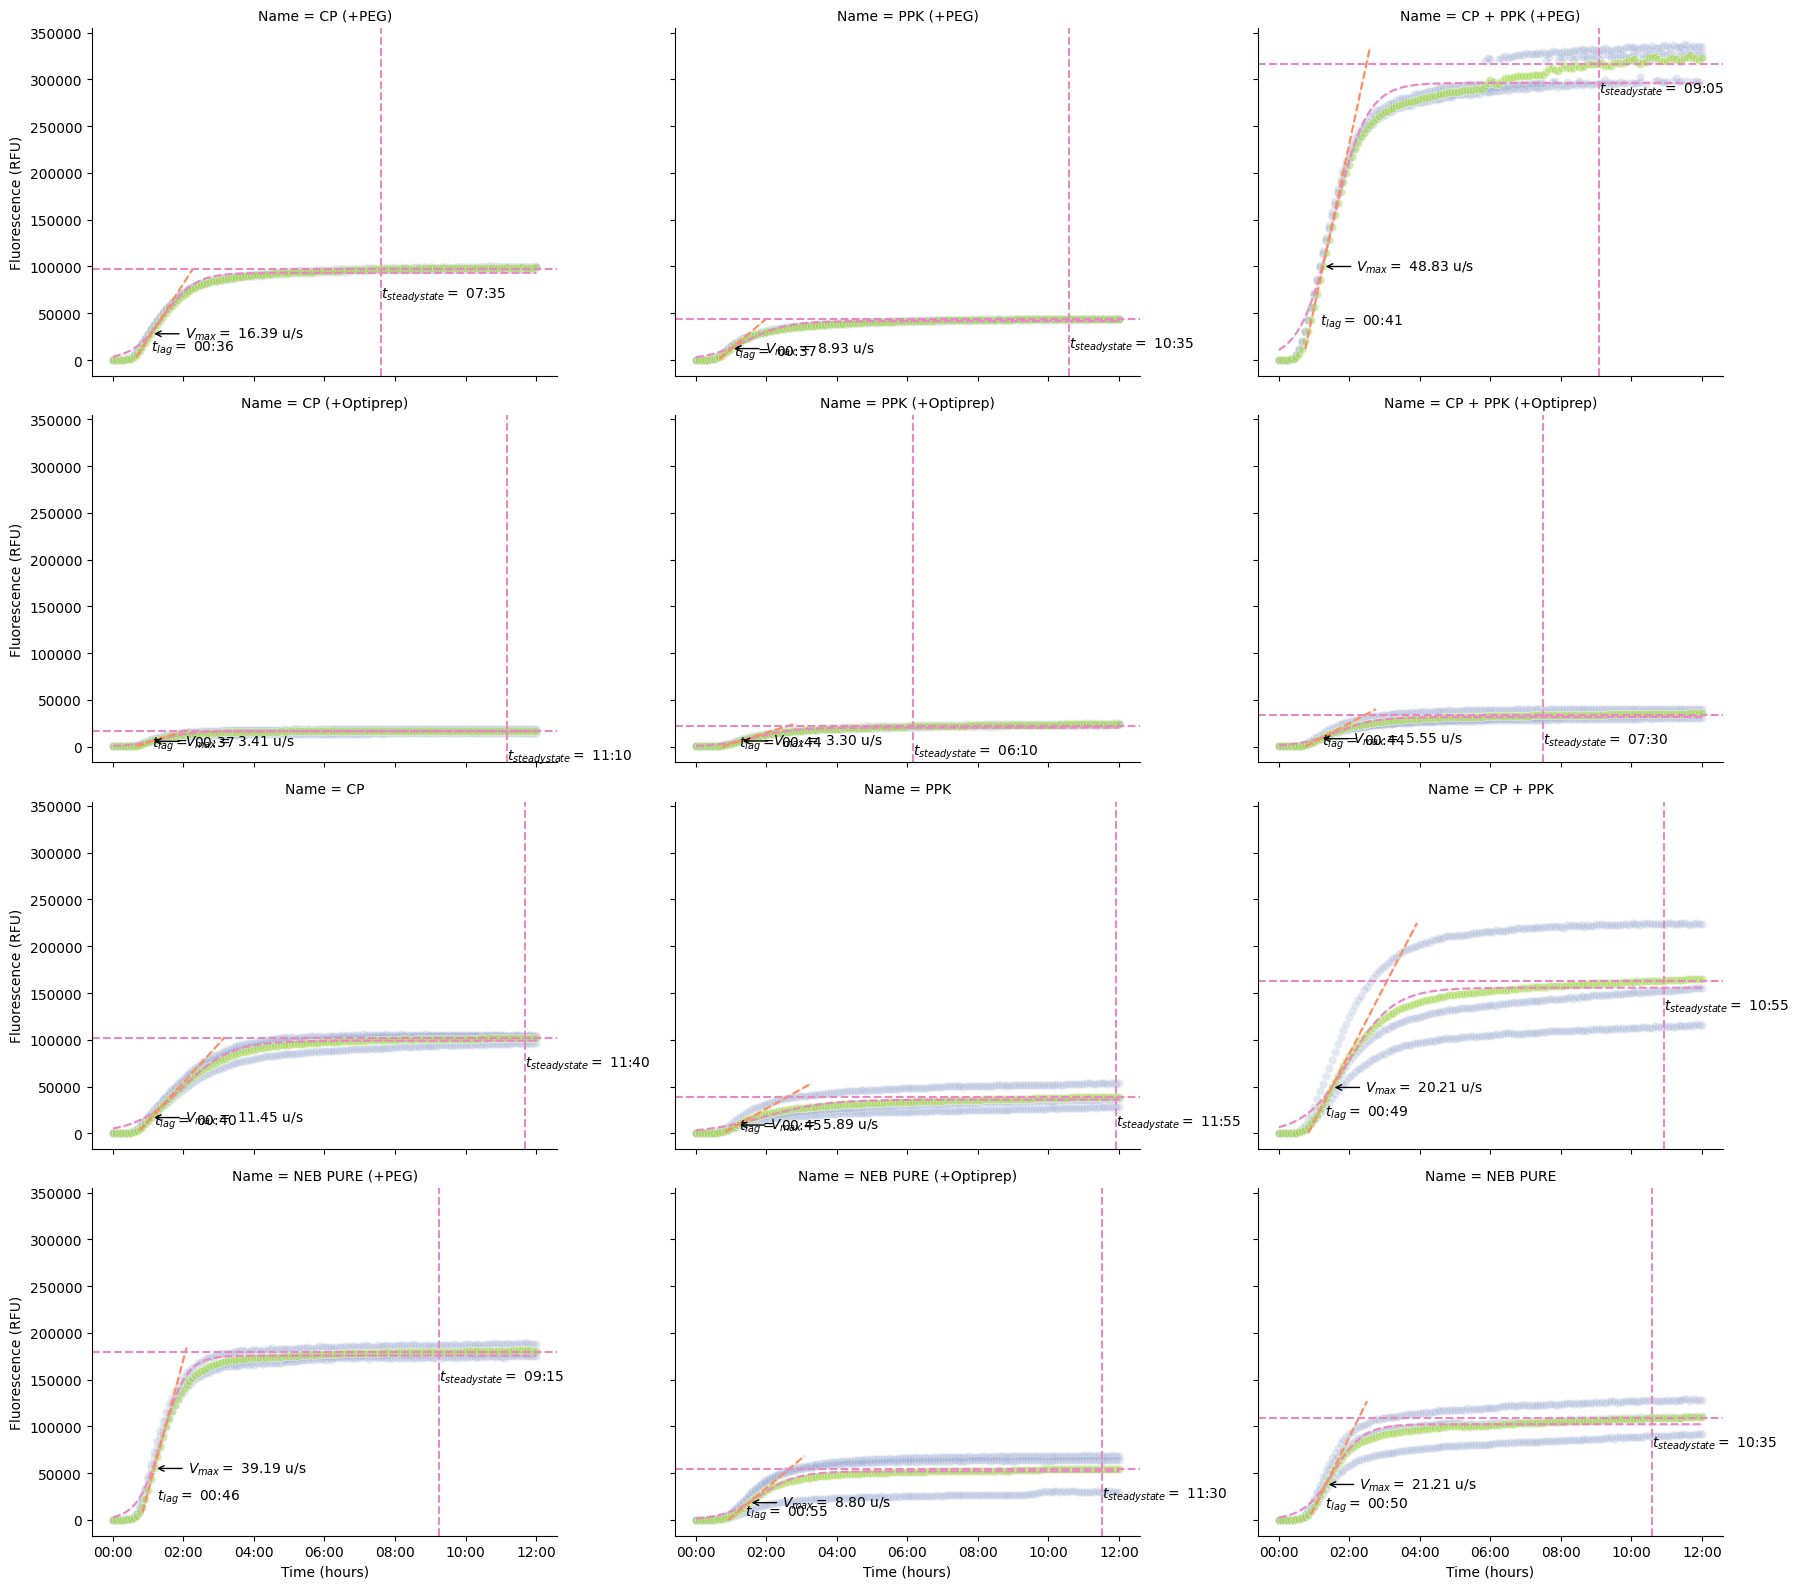

In [33]:
pr.plot_kinetics(data, col_wrap=3)

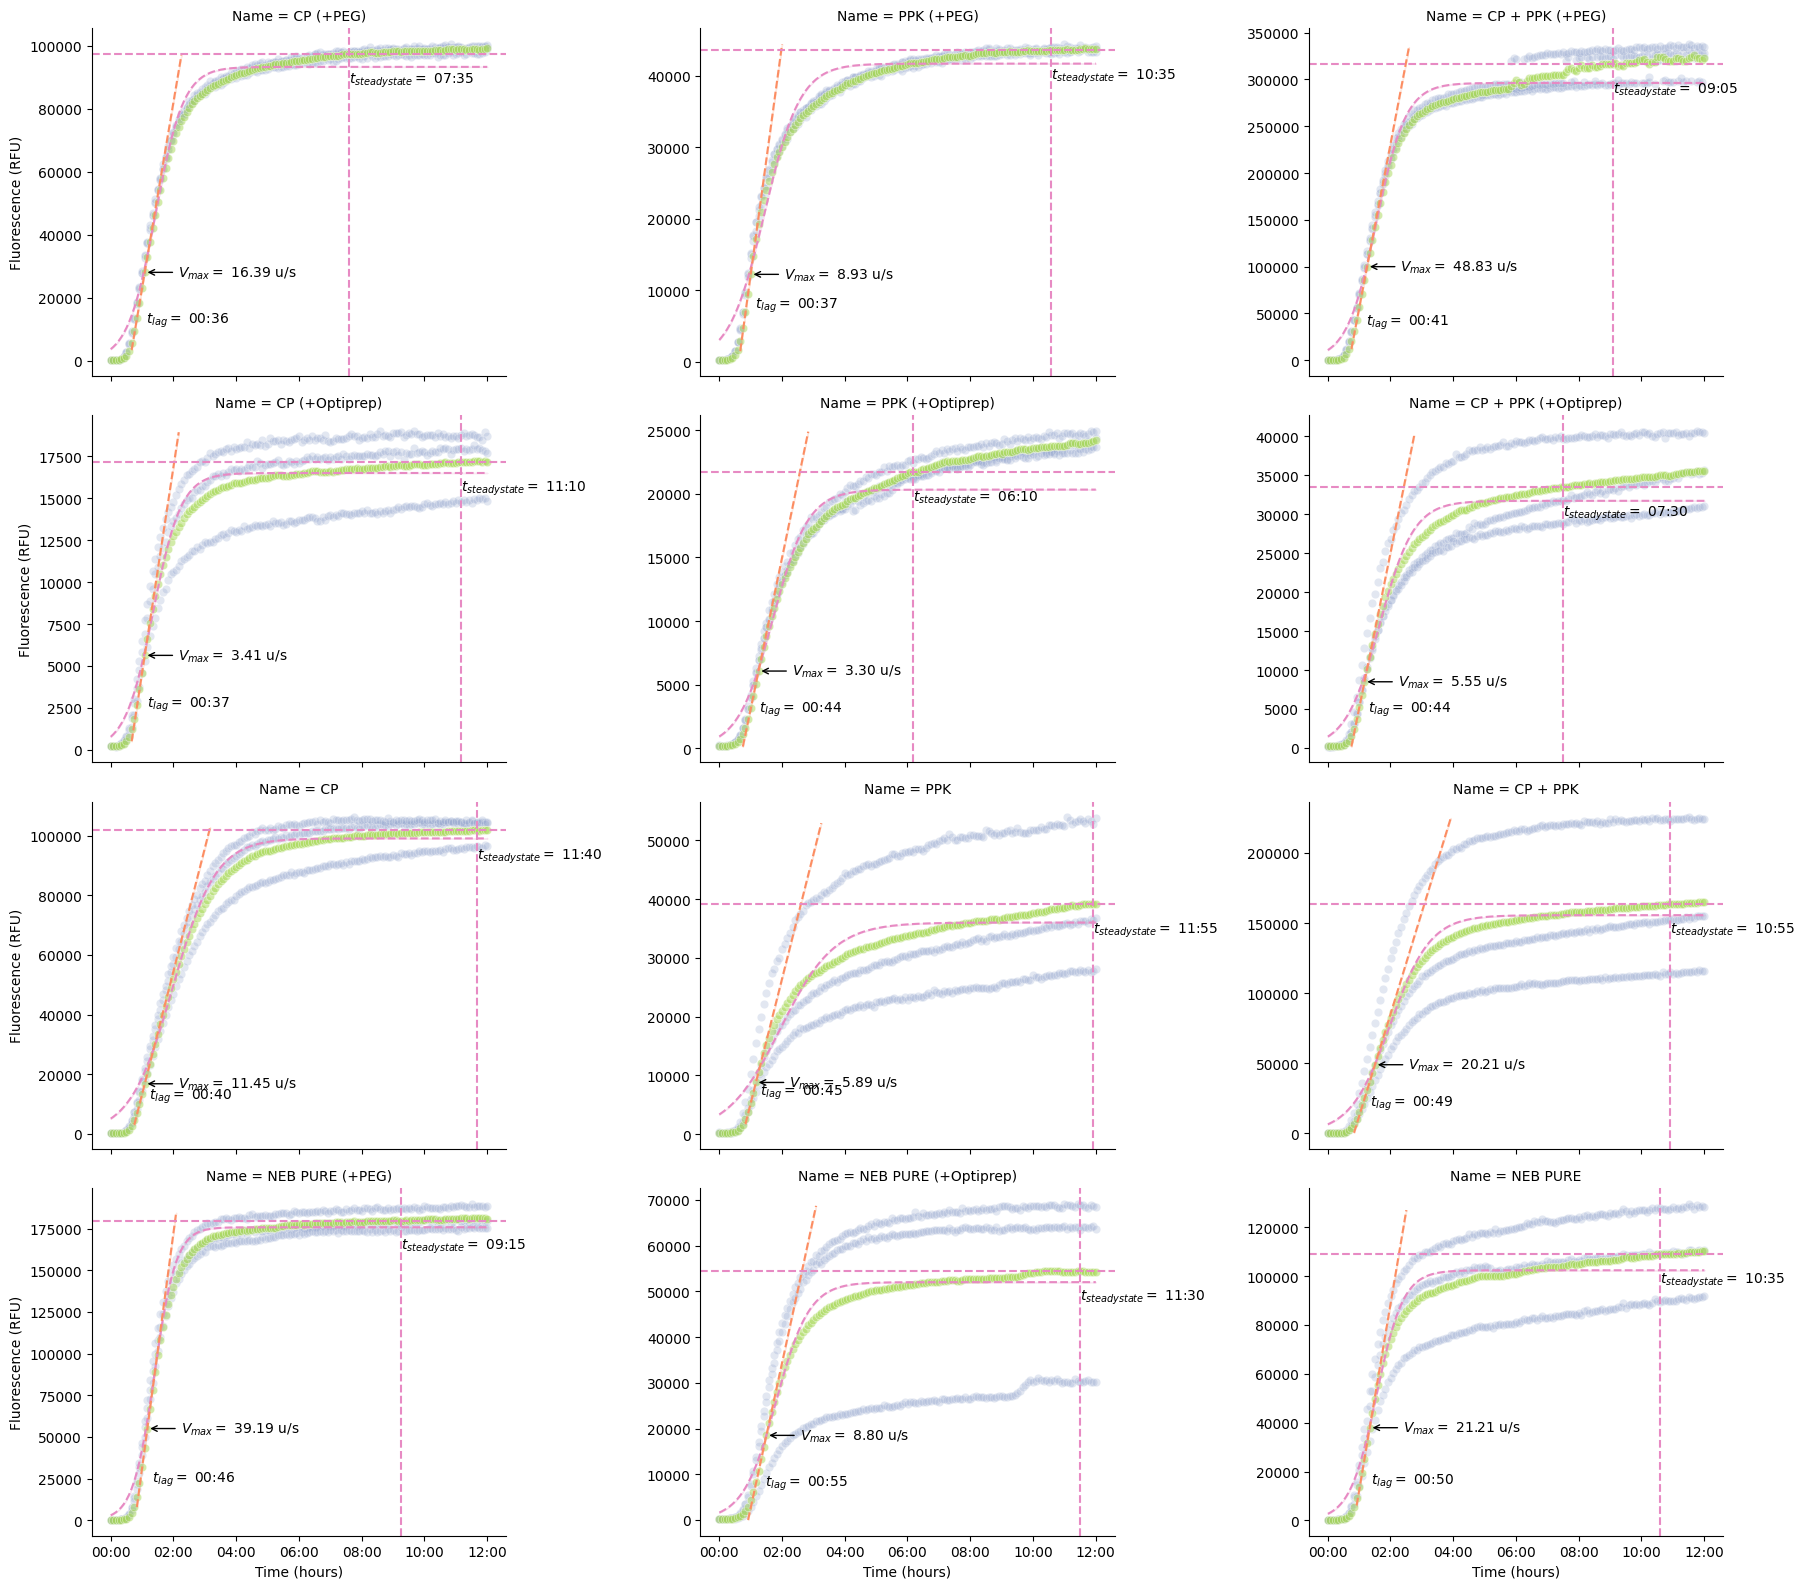

In [38]:
pr.plot_kinetics(data, col_wrap=3, sharey=False)

We don't have specific functions yet, but we can also use the kinetic analysis table to drill into some specifics (like how long each well takes to get to steady state).

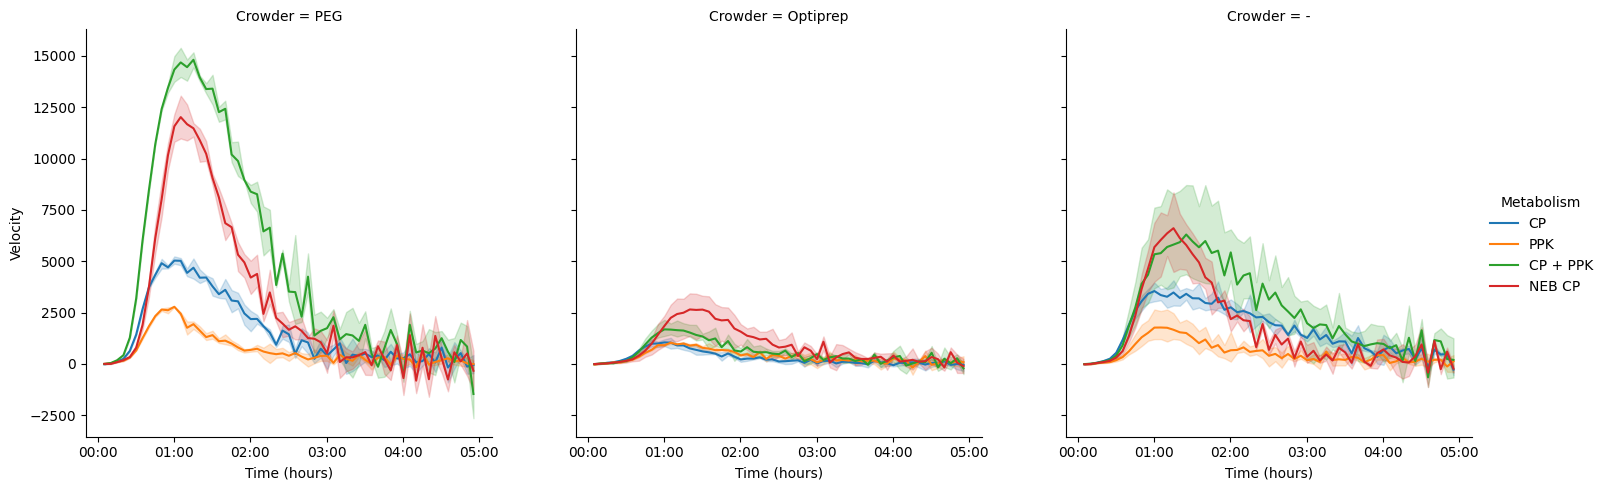

In [35]:
import seaborn as sns

data["Velocity"] = data["Data"].diff()
g = sns.relplot(
    data=data[(data["Time"] > "00:00:30") & (data["Time"] <= "5:00:00")], 
    x="Time", 
    y="Velocity", 
    hue="Metabolism", 
    col="Crowder", 
    kind="line")
pr._plot_timedelta(g)

In [39]:
kinetics = pr.kinetic_analysis(data)
kinetics

Velocity                                      Lag  \
                                Time     Data   Max                      Time   
Name                                                                            
CP (+PEG)            0 days 01:05:23 28039.00 16.39 0 days 00:36:52.532309083   
PPK (+PEG)           0 days 01:00:23 12226.56  8.93 0 days 00:37:34.412462170   
CP + PPK (+PEG)      0 days 01:15:23 99991.44 48.83 0 days 00:41:15.393629124   
CP (+Optiprep)       0 days 01:05:23  5632.00  3.41 0 days 00:37:52.462715728   
PPK (+Optiprep)      0 days 01:15:23  6071.56  3.30 0 days 00:44:43.960287189   
CP + PPK (+Optiprep) 0 days 01:10:23  8493.33  5.55 0 days 00:44:51.443197756   
CP                   0 days 01:05:23 16827.56 11.45 0 days 00:40:53.914734698   
PPK                  0 days 01:10:23  8790.11  5.89 0 days 00:45:29.400251731   
CP + PPK             0 days 01:30:23 49034.00 20.21 0 days 00:49:57.264355601   
NEB PURE (+PEG)      0 days 01:10:23 55063.00 39.19 0 days 00:46:57.880252538   
NEB PURE (+Optiprep) 0 days 01:30:23 18499.56  8.80 0 days 00:55:21.308507953   
NEB PURE             0 days 01:20:23 37936.78 21.21 0 days 00:50:34.622872108   

                                 Steady State                 Fit       \
                         Data            Time      Data         L    k   
Name                                                                     
CP (+PEG)            12851.46 0 days 07:35:23  97203.44  93241.20 0.00   
PPK (+PEG)            7939.90 0 days 10:35:23  43582.33  41692.02 0.00   
CP + PPK (+PEG)      40906.58 0 days 09:05:23 316915.11 296303.79 0.00   
CP (+Optiprep)        2729.12 0 days 11:10:23  17146.89  16509.45 0.00   
PPK (+Optiprep)       3077.10 0 days 06:10:23  21715.67  20337.63 0.00   
CP + PPK (+Optiprep)  5016.72 0 days 07:30:23  33463.11  31732.04 0.00   
CP                   12684.11 0 days 11:40:23 101743.00  99080.19 0.00   
PPK                   7109.55 0 days 11:55:23  39104.44  36021.51 0.00   
CP + PPK             21578.65 0 days 10:55:23 163306.67 155680.86 0.00   
NEB PURE (+PEG)      25186.24 0 days 09:15:23 179814.89 175809.76 0.00   
NEB PURE (+Optiprep)  8078.07 0 days 11:30:23  54373.89  51998.21 0.00   
NEB PURE             16339.58 0 days 10:35:23 108887.78 102407.41 0.00   

                                   
                          x0  R^2  
Name                               
CP (+PEG)            5165.47 0.99  
PPK (+PEG)           5217.55 0.97  
CP + PPK (+PEG)      5594.41 0.97  
CP (+Optiprep)       4891.93 0.85  
PPK (+Optiprep)      6162.70 0.98  
CP + PPK (+Optiprep) 5962.02 0.86  
CP                   7172.59 0.96  
PPK                  7048.33 0.54  
CP + PPK             7184.66 0.60  
NEB PURE (+PEG)      5036.36 0.98  
NEB PURE (+Optiprep) 6539.50 0.50  
NEB PURE             5594.07 0.81

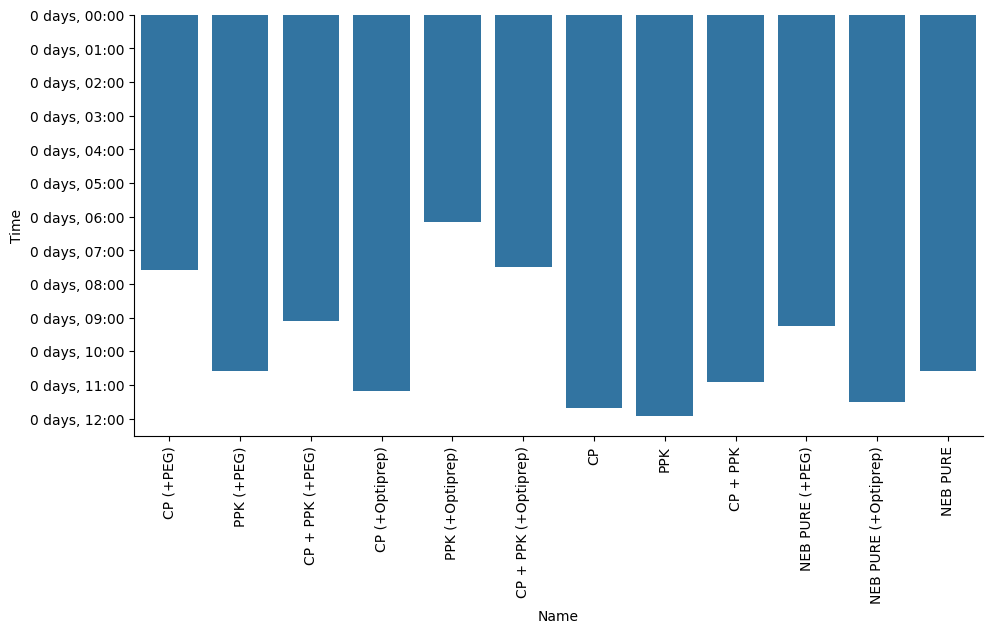

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

g = sns.catplot(data=kinetics["Steady State"], y="Time", x="Name", kind="bar", orient="v", aspect=2)

# The names are still kind of long, so we need to rotate them in order to read them properly.
g.set_xticklabels(rotation=90)

Quick experiment to see if there is some spatial effect to the variance on the plate. It doesn't particularly look like it, though I could belive that it's getting kind of worse as we go down from row B, to C, to D.

<Axes: xlabel='Col', ylabel='Row'>

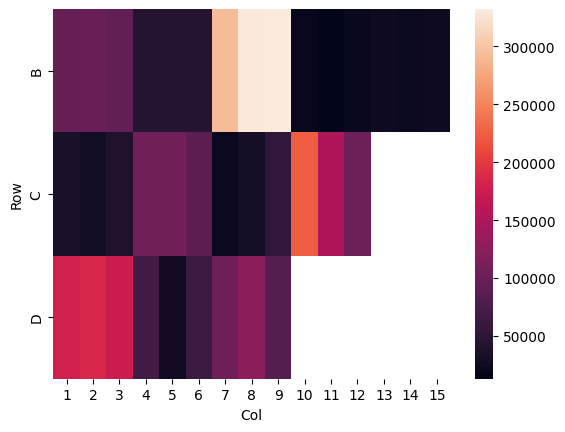

In [71]:
ss = pr.find_steady_state(data, group_by="Well").reset_index()
ss["Row"] = ss["Well"].str[:1]
ss["Col"] = pd.to_numeric(ss["Well"].str[1:])
sns.heatmap(ss.pivot(index="Row", columns="Col", values="Data_steadystate"))

# Summary

Overall summary of experiment

/home/acjs/.conda/envs/bnext-cdk-acjs/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


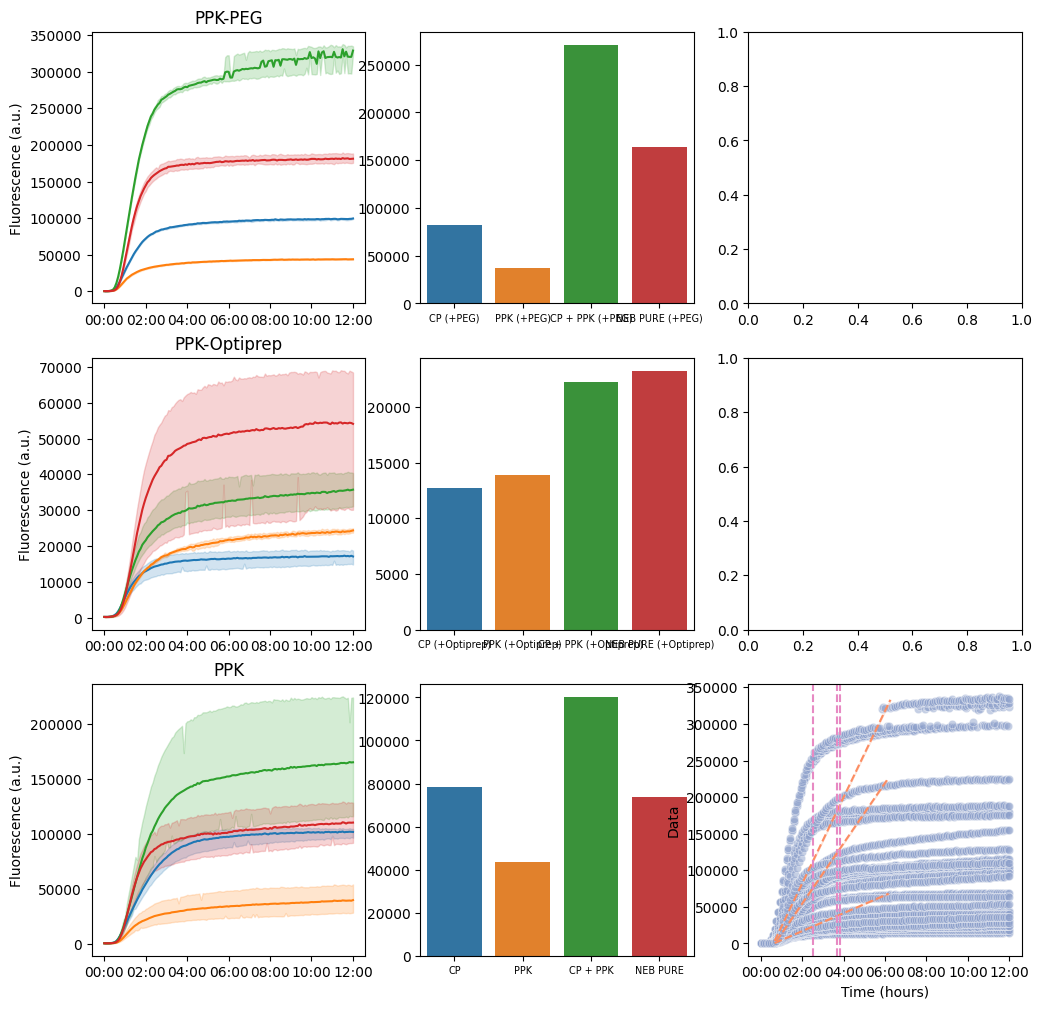

In [75]:
pr.plot_summary(data)

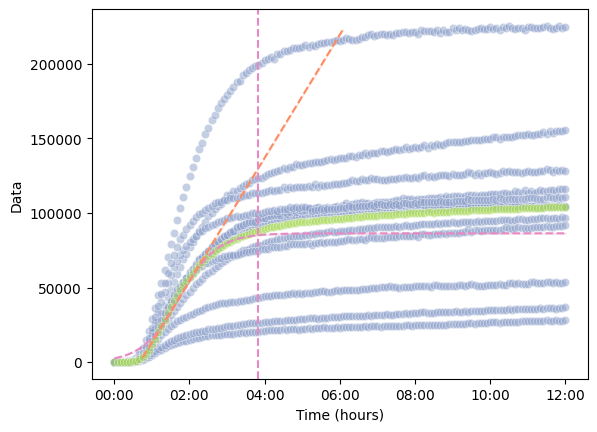

In [86]:
df = data[data["Experiment"] == "PPK"]
kinetics = pr.kinetic_analysis(df, ["Name"])
kinetics
pr.plot_kinetics_by_well(
    data=df,
    kinetics=kinetics,
    group_by=["Name"],
    show_mean=True,
    show_fit=True,
    annotate=False,
    hue="Name"
)

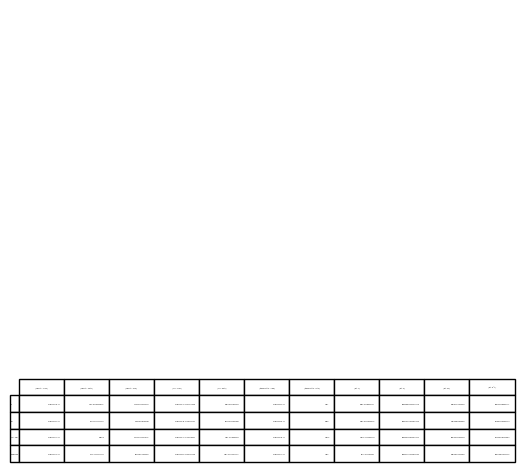

In [91]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots()
ax.axis('off')
pd.plotting.table(ax, pr.kinetic_analysis(df))